In [1]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import albumentations as A
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
input_dir = "/kaggle/input/aug-data"
output_dir = "/kaggle/working/"

In [5]:
image_files = [f for f in os.listdir(input_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [19]:
heavy_rain_aug = A.Compose([
    A.RandomRain(
        rain_type='heavy',
        drop_length=25,
        drop_width=1,
        blur_value=5,
        brightness_coefficient=0.6,
        p=1.0
    ),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, -0.1), contrast_limit=0.2, p=0.5),
])

night_rain_aug = A.Compose([
    A.RandomRain(
        rain_type="heavy", 
        drop_length=30, 
        drop_width=1, 
        blur_value=7,
        brightness_coefficient=0.7,  # less dark
        p=1.0
    ),
    A.RGBShift(r_shift_limit=0, g_shift_limit=0, b_shift_limit=30, p=0.8),  # blue tint
    A.RandomBrightnessContrast(brightness_limit=(-0.2, -0.1), contrast_limit=0.3, p=1.0),
])

In [30]:
def show_comparison(original, rain_img, night_img, title):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    
    axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(rain_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Heavy Rain")
    axs[1].axis('off')

    axs[2].imshow(cv2.cvtColor(night_img, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Night Rain (Bluish)")
    axs[2].axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


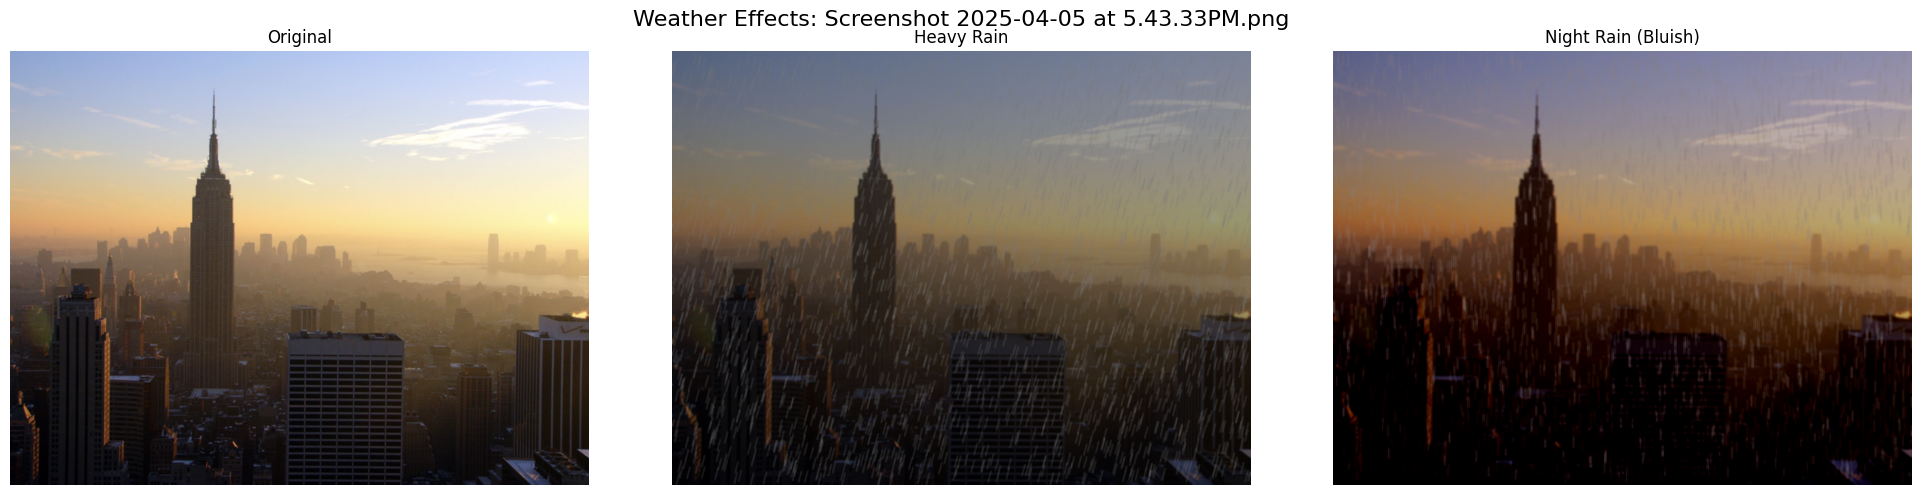

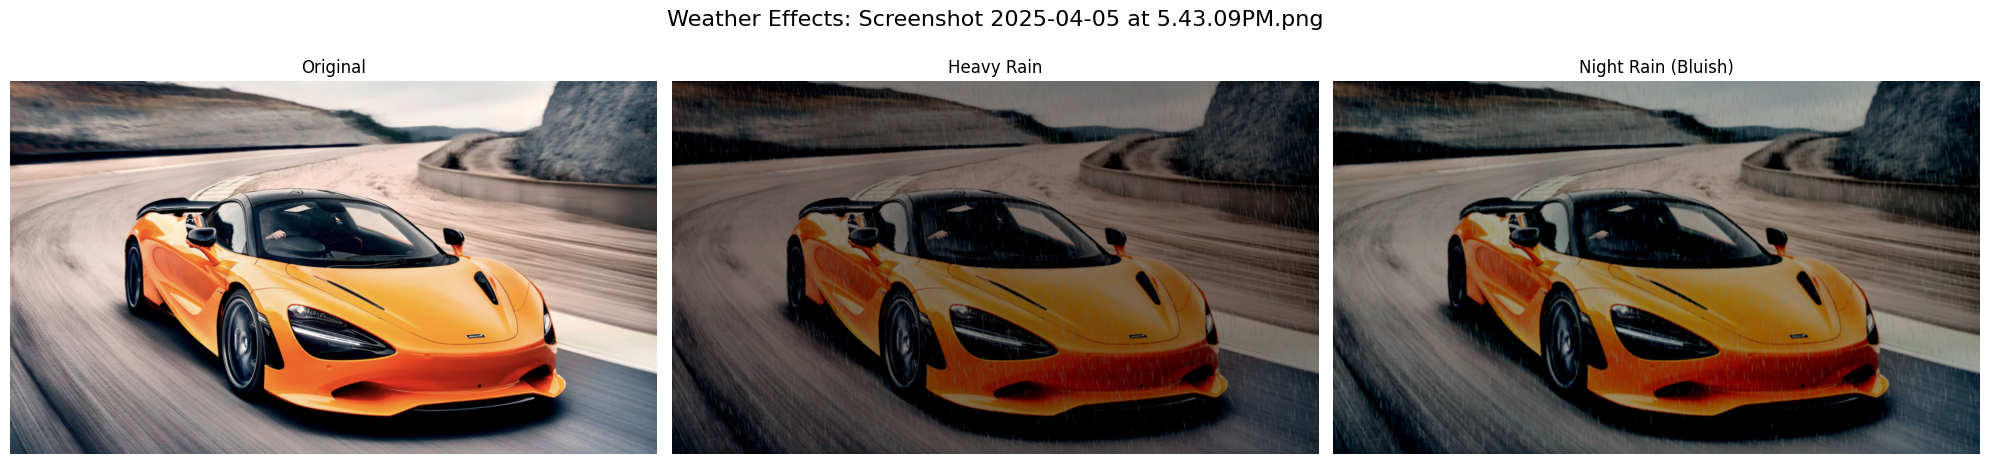

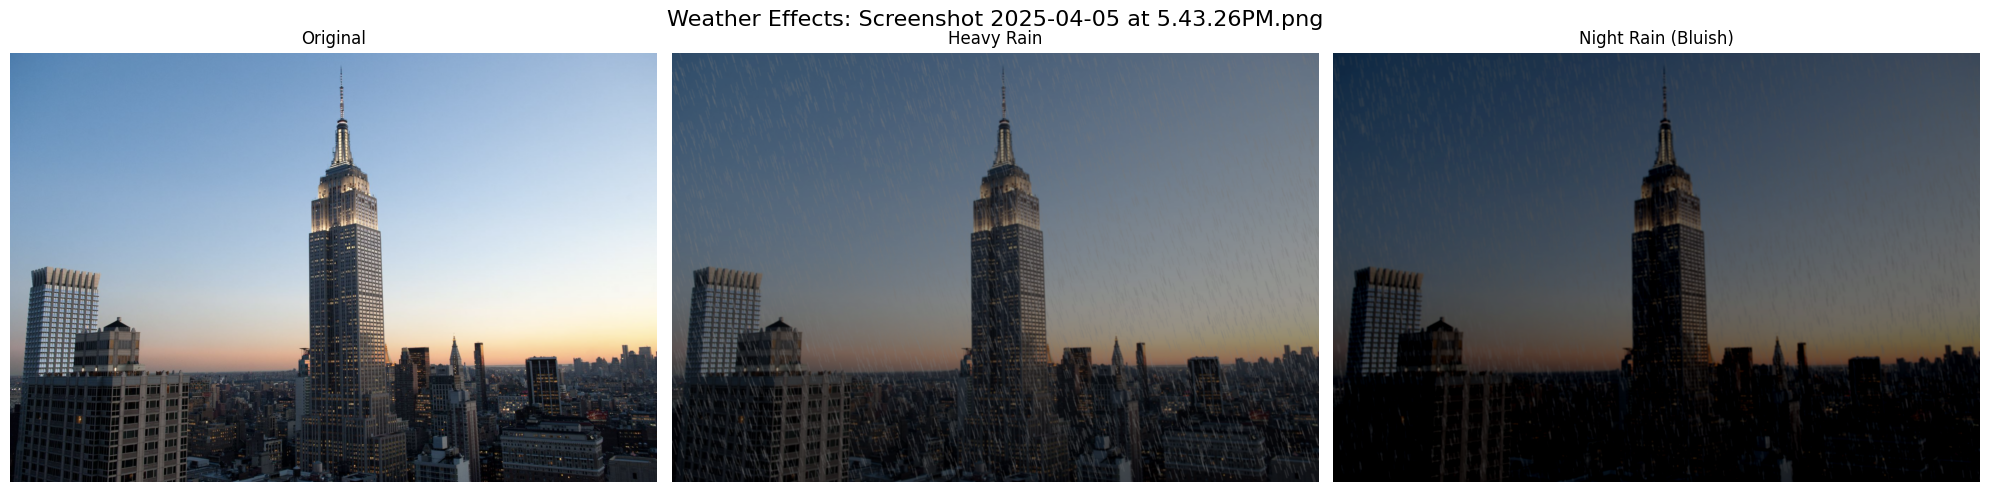

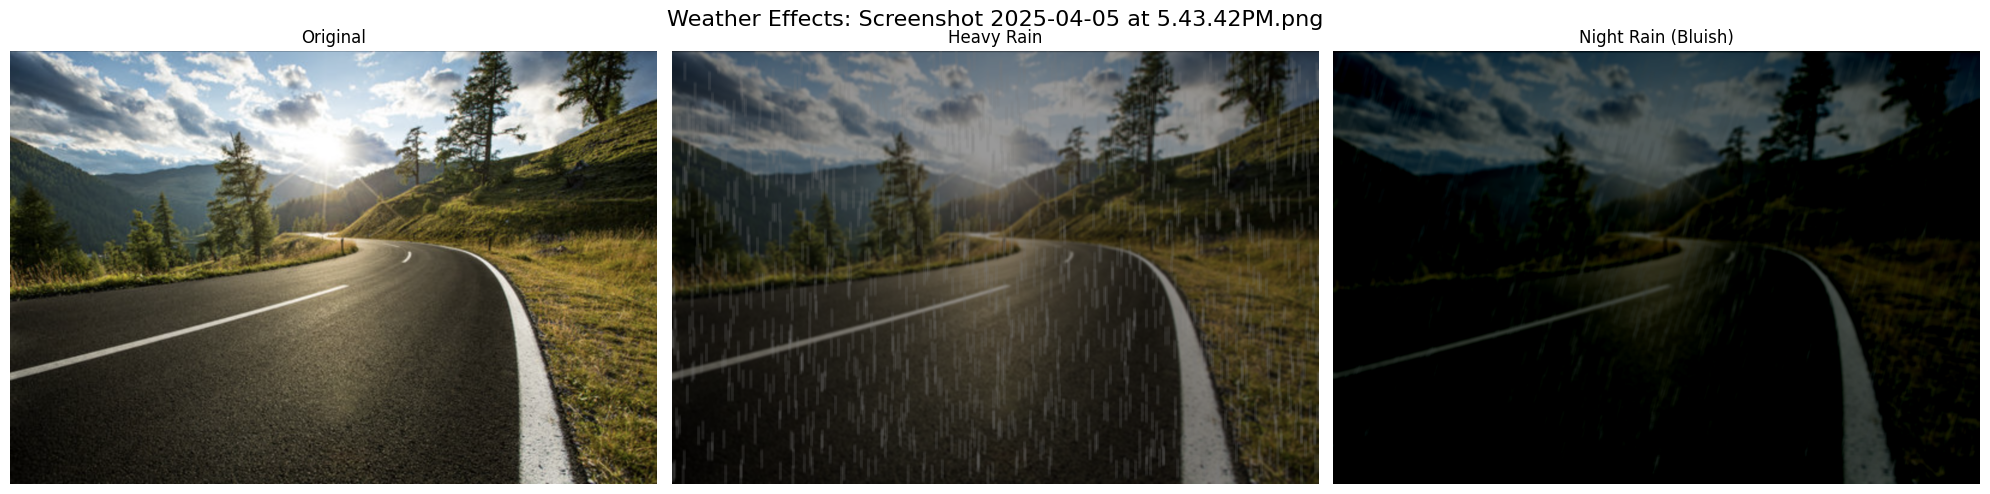

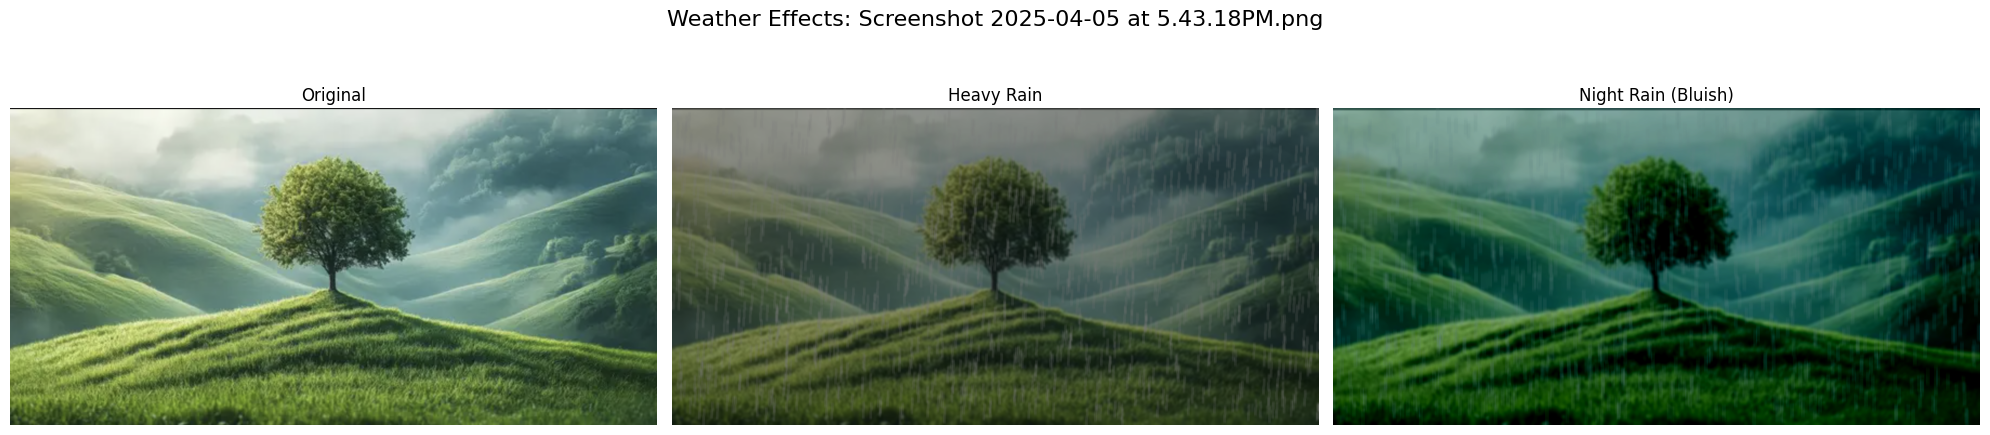

In [32]:
for img_file in image_files[:6]:
    img_path = os.path.join(input_dir, img_file)
    original = cv2.imread(img_path)

    rain_img = heavy_rain_aug(image=original.copy())['image']
    night_img = night_rain_aug(image=original.copy())['image']

  
    show_comparison(original, rain_img, night_img, f"Weather Effects: {img_file}")


    base_name = os.path.splitext(img_file)[0]
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_original.jpg"), original)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_rain.jpg"), rain_img)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_night.jpg"), night_img)
